---
title: Generate sample Cosmology data for Cheap and FAIR data portal with PySM
date: 2024-08-28
categories:
    - cosmology
    - healpy
    - pysm
---

# Generate figures for PySM

This notebook generates some figures of Galactic and Extra-Galactic emissions using PySM. Mostly for displaying purposes.

This notebook is designed to work on Google Colab, remove the `apt` lines if executing locally but make sure you have a Latex environment.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ln -s /content/drive/MyDrive/dataportal_demo_data data

In [ ]:
# Install Latex to render labels
!apt install texlive texlive-latex-extra texlive-fonts-recommended cm-super-minimal dvipng

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cm-super-minimal is already the newest version (0.3.4-17).
dvipng is already the newest version (1.15-1.1).
texlive is already the newest version (2021.20220204-1).
texlive-fonts-recommended is already the newest version (2021.20220204-1).
texlive-latex-extra is already the newest version (2021.20220204-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [ ]:
%pip install pysm3

In [ ]:
import pysm3
from pysm3 import units as u
import healpy as hp
import numpy as np

In [ ]:
sky = pysm3.Sky(nside=128, preset_strings=["c3"], output_unit=u.uK_CMB)

In [ ]:
cmb = sky.get_emission(100 * u.GHz)

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True

In [ ]:
freqs = [23, 100, 143, 353, 545, 857] * u.GHz

In [ ]:
fontsize={"title":30, "cbar_label":20, "cbar_tick_label":20}

In [ ]:
!rm -rf data/cmb
!mkdir -p data/cmb

In [ ]:
import astropy.units

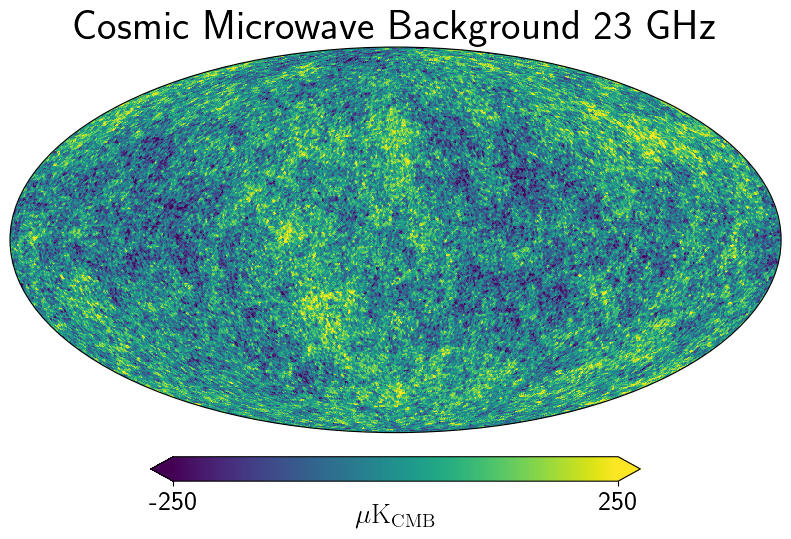

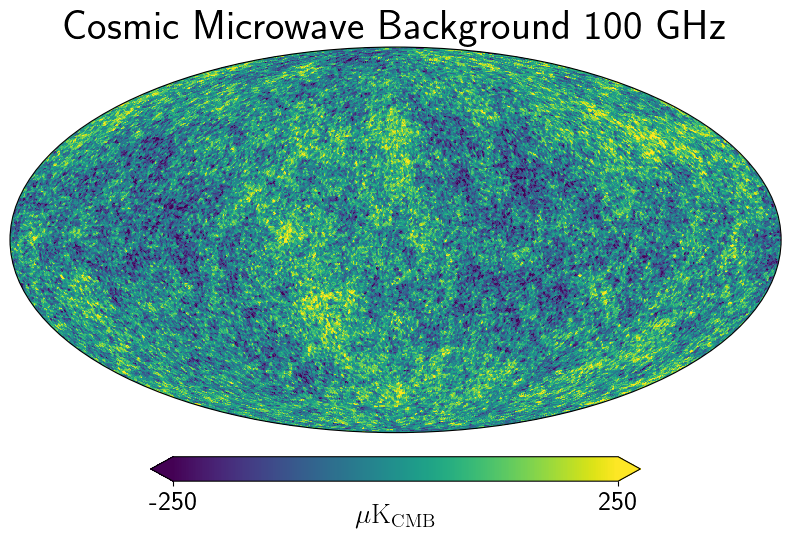

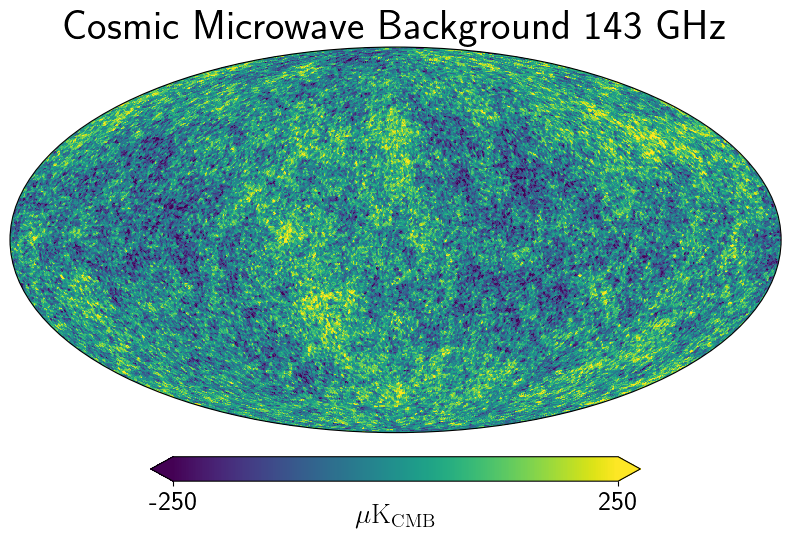

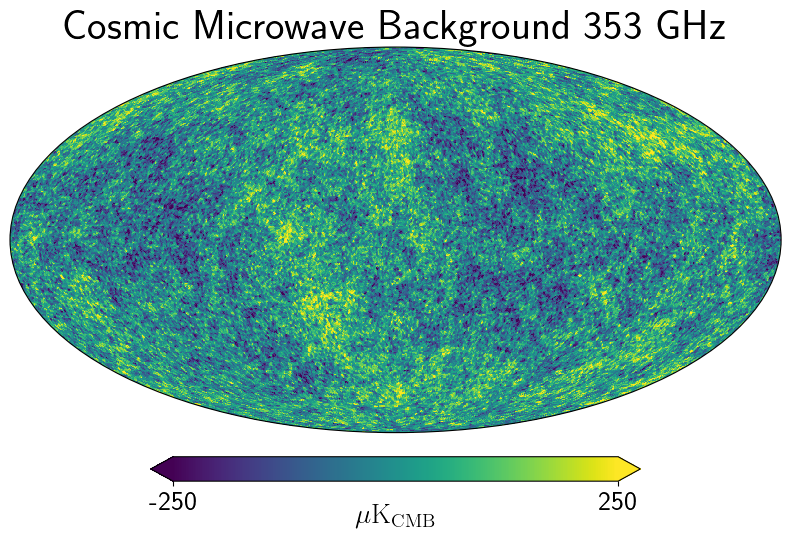

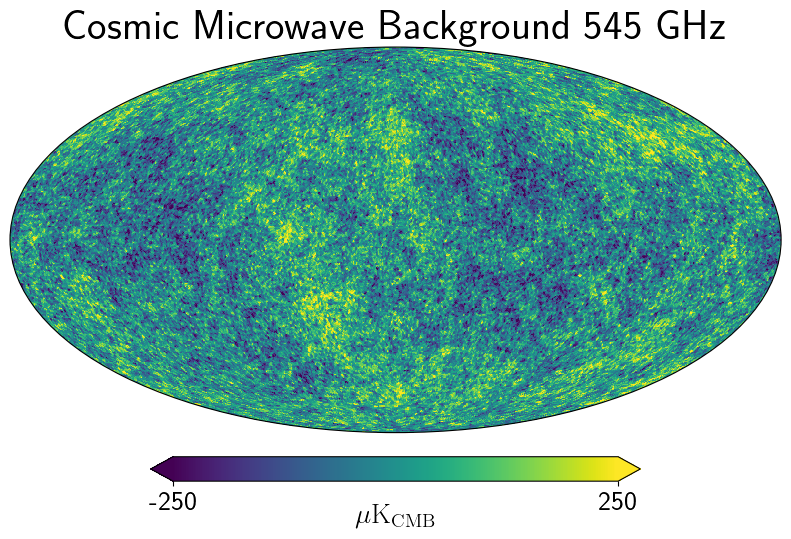

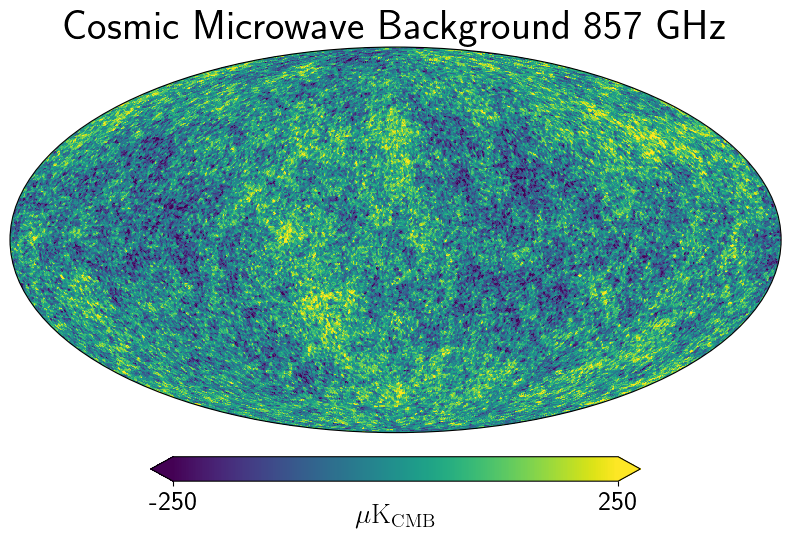

In [ ]:
for freq in freqs:
  m = sky.get_emission(freq)
  hp.projview(m[0].value, min=-250, max=250,
            fontsize=fontsize,
            unit=astropy.units.format.Latex.to_string(m.unit), title=f"Cosmic Microwave Background {int(freq.value)} {freq.unit}");
  filename = f"data/cmb/cmb_{int(freq.value):03d}{freq.unit}"
  plt.savefig(f"{filename}.jpg", bbox_inches="tight")
  hp.write_map(f"{filename}.fits", m, dtype=np.float32, overwrite=True)

In [ ]:
%ls -lah cmb/

total 4.0M
drwxr-xr-x 2 root root 4.0K Aug 28 21:02 ./
drwxr-xr-x 1 root root 4.0K Aug 28 21:05 ../
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_023GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_023GHz.jpg
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_100GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_100GHz.jpg
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_143GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_143GHz.jpg
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_353GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_353GHz.jpg
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_545GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_545GHz.jpg
-rw-r--r-- 1 root root 583K Aug 28 21:02 cmb_857GHz.fits
-rw-r--r-- 1 root root  89K Aug 28 21:02 cmb_857GHz.jpg


In [ ]:
sky = pysm3.Sky(nside=128, preset_strings=["s5"], output_unit=u.mK_RJ)
sync = sky.get_emission(23 * u.GHz)[0]

In [ ]:
!rm -rf data/synch
!mkdir data/synch

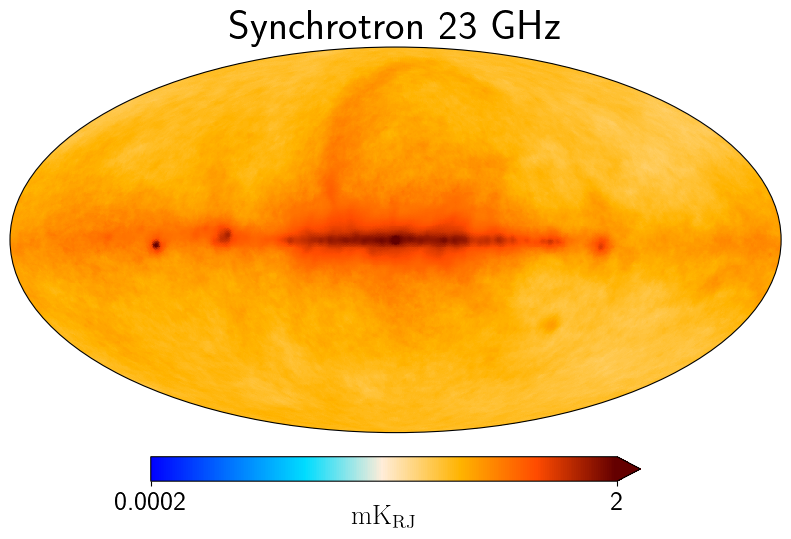

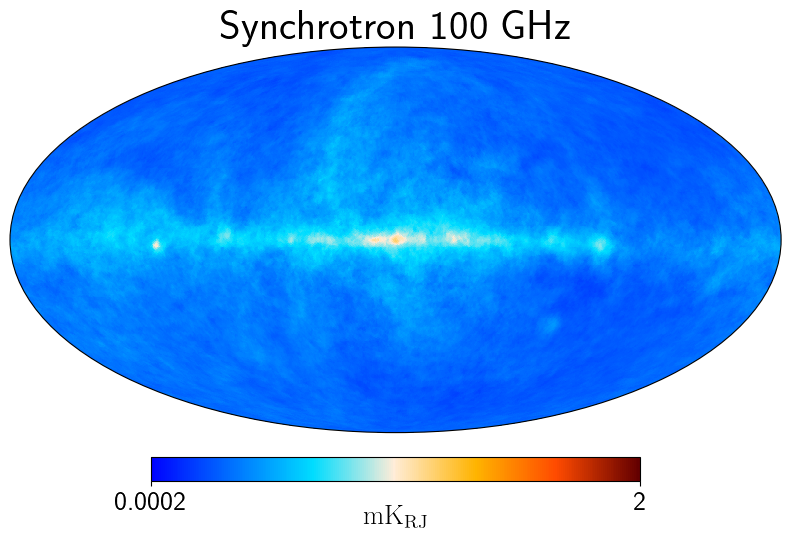

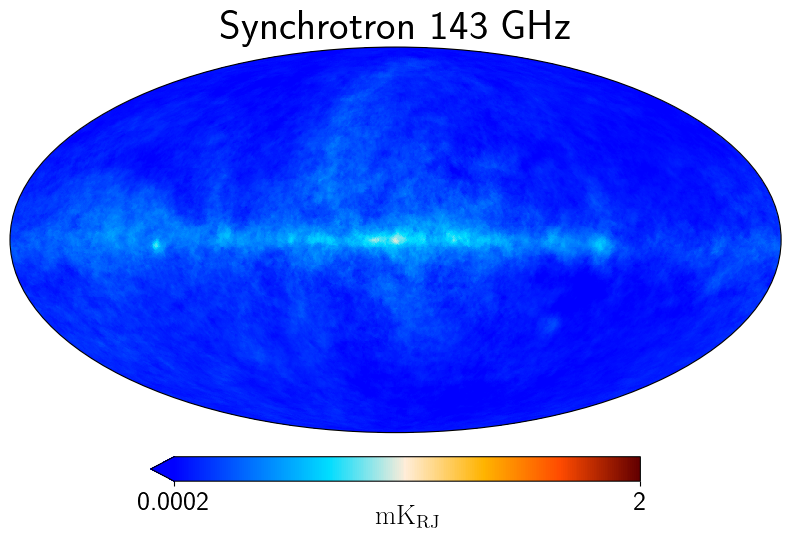

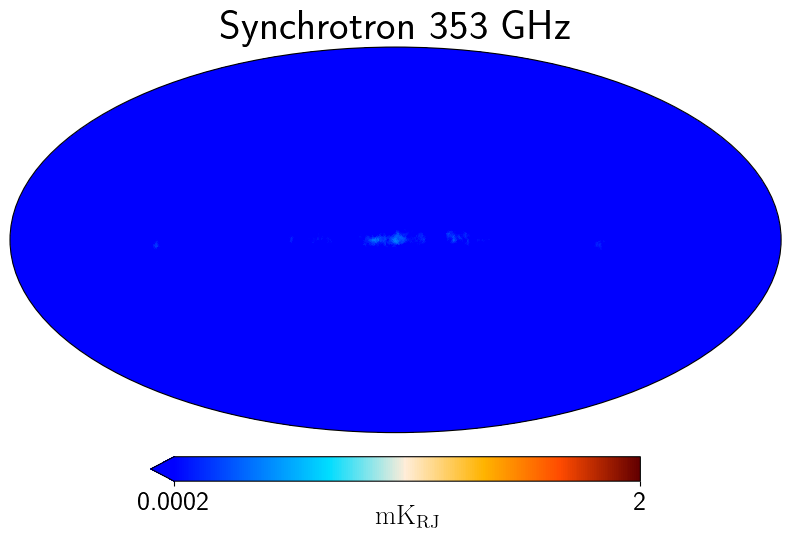

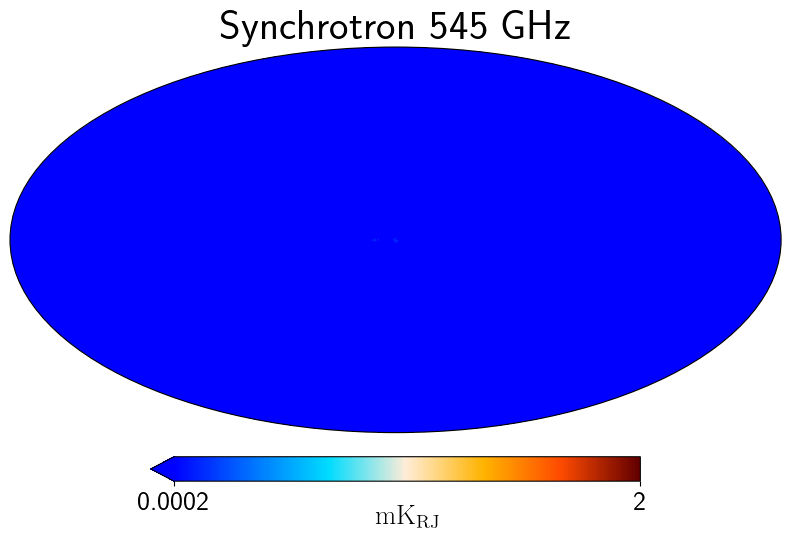

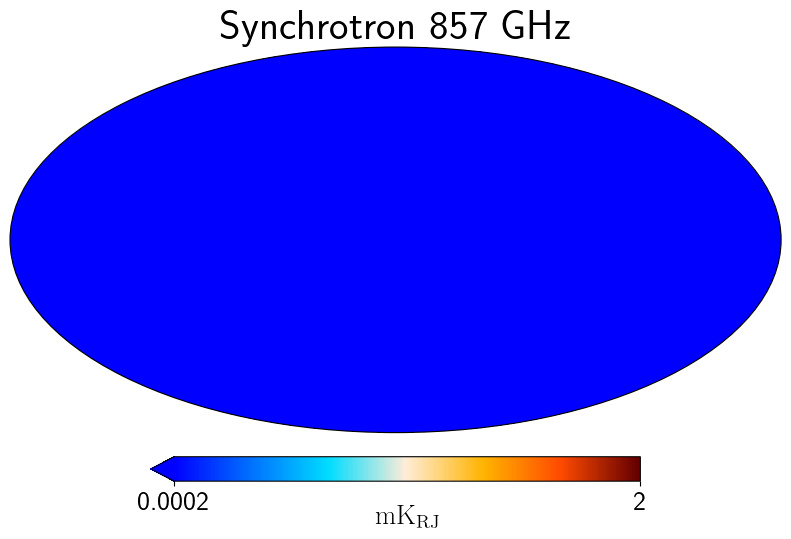

In [ ]:
for freq in freqs:
  m = sky.get_emission(freq)
  hp.projview(m[0].value,  min=2e-4, max=2,
            fontsize=fontsize, norm="log", cmap="planck",
            unit=astropy.units.format.Latex.to_string(m.unit), title=f"Synchrotron {int(freq.value)} {freq.unit}");
  filename = f"data/synch/synch_{int(freq.value):03d}{freq.unit}"
  plt.savefig(f"{filename}.jpg", bbox_inches="tight")
  hp.write_map(f"{filename}.fits", m, dtype=np.float32, overwrite=True)

In [ ]:
!rm -rf data/dust
!mkdir data/dust

In [ ]:
sky = pysm3.Sky(nside=128, preset_strings=["d10"], output_unit=u.mK_RJ)


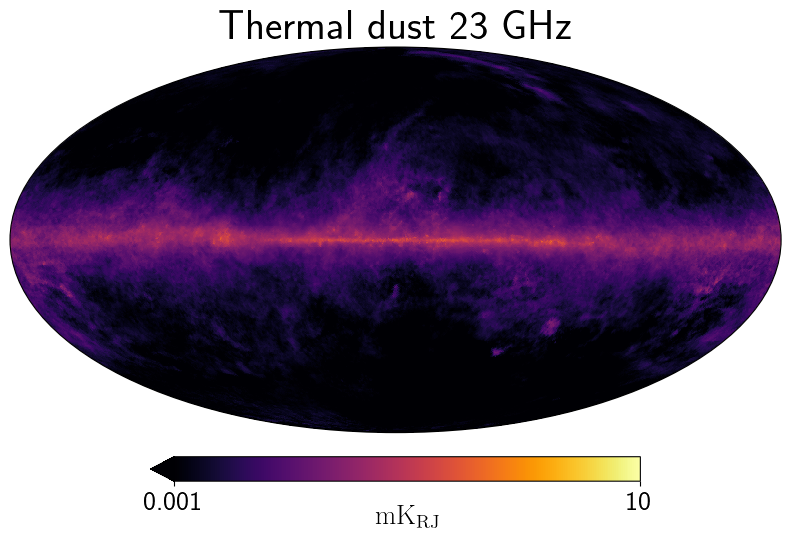

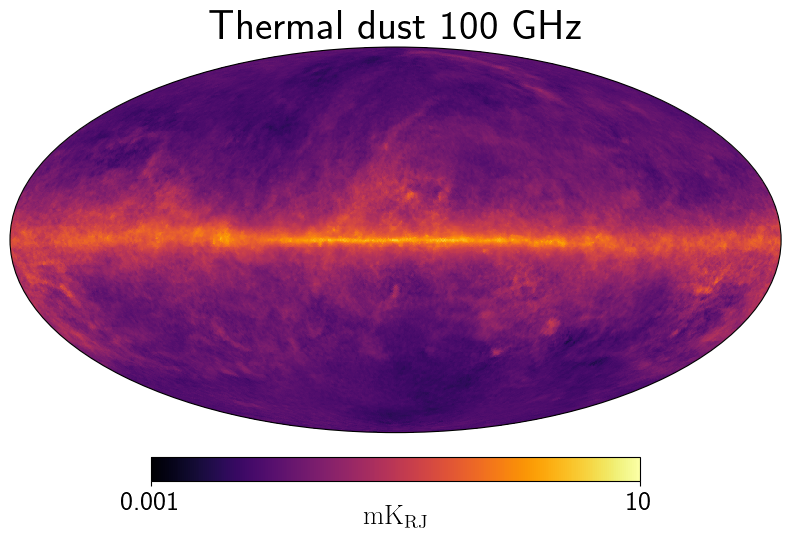

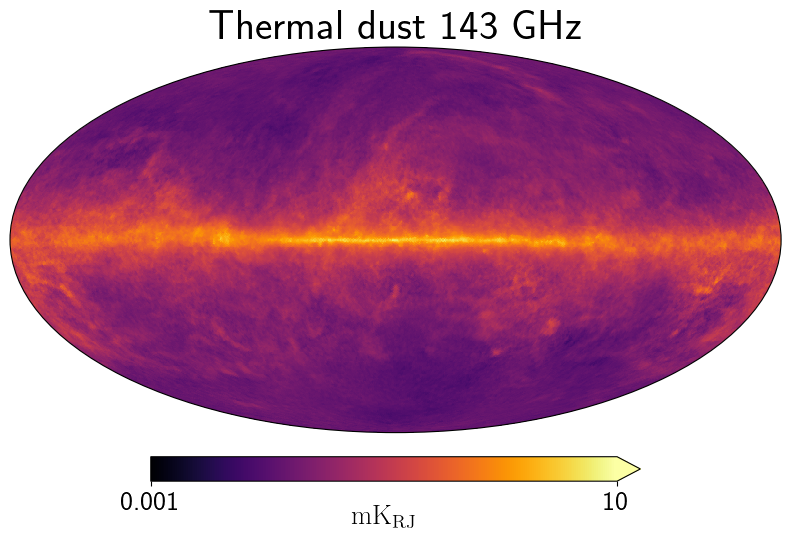

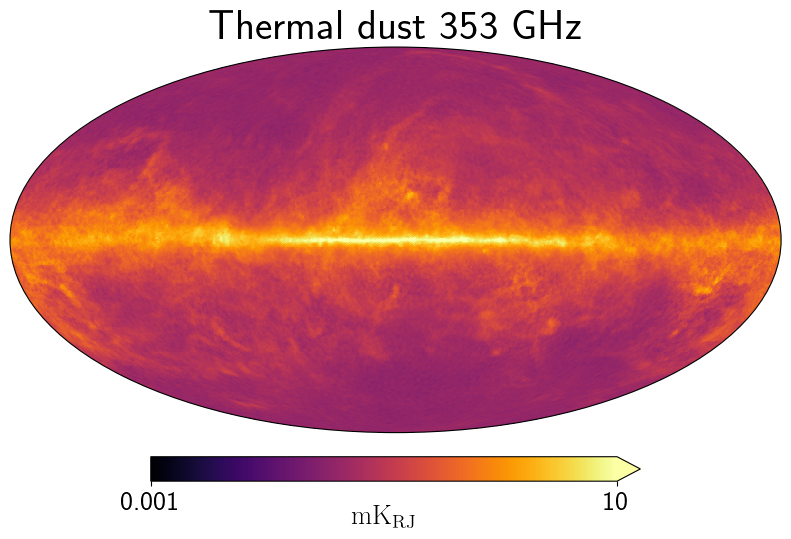

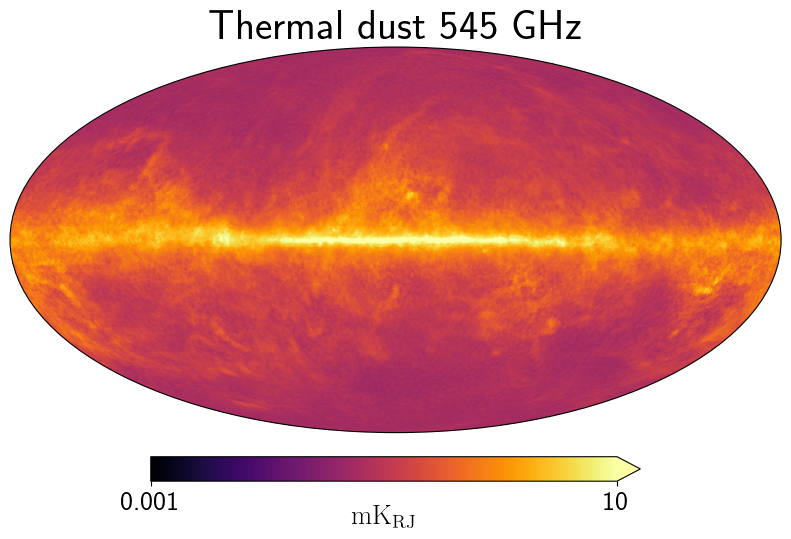

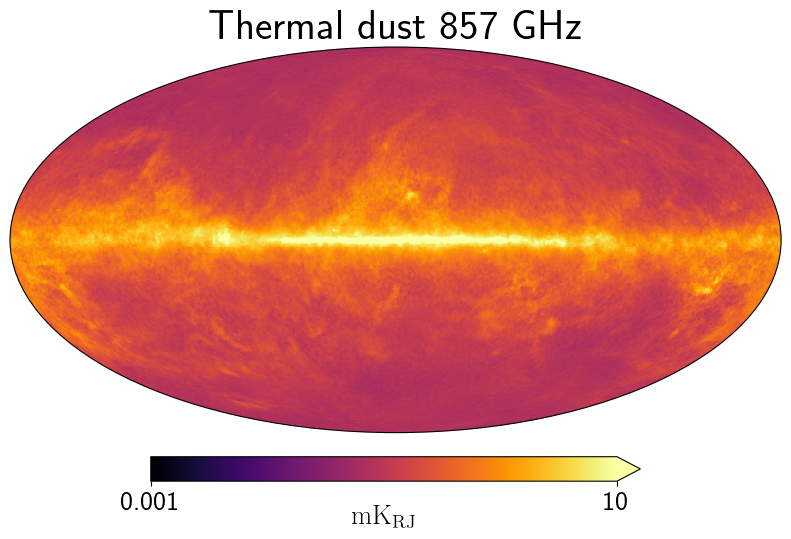

In [ ]:
for freq in freqs:
  m = sky.get_emission(freq)
  hp.projview(m[0].value,  min=1e-3, max=10,
            fontsize=fontsize, norm="log", cmap="inferno",
            unit=astropy.units.format.Latex.to_string(m.unit), title=f"Thermal dust {int(freq.value)} {freq.unit}");
  filename = f"data/dust/dust_{int(freq.value):03d}{freq.unit}"
  plt.savefig(f"{filename}.jpg", bbox_inches="tight")
  hp.write_map(f"{filename}.fits", m, dtype=np.float32, overwrite=True)

In [ ]:
!wget https://github.com/ajvanengelen/webskylensing/raw/master/data/unlensed_scalar_cls.npy

--2024-08-28 21:10:32--  https://github.com/ajvanengelen/webskylensing/raw/master/data/unlensed_scalar_cls.npy
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ajvanengelen/webskylensing/master/data/unlensed_scalar_cls.npy [following]
--2024-08-28 21:10:32--  https://raw.githubusercontent.com/ajvanengelen/webskylensing/master/data/unlensed_scalar_cls.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 594200 (580K) [application/octet-stream]
Saving to: ‘unlensed_scalar_cls.npy.2’

unlensed_scalar_cls 100%[===================>] 580.27K  --.-KB/s    in 0.07s   

2024-08-28 21:10:32 (8.37 MB/s) - ‘u

In [ ]:
cl = np.load("unlensed_scalar_cls.npy")

In [ ]:
import pandas as pd

In [ ]:
cl_dataframe = pd.DataFrame({"TT":cl[0,0], "TE":cl[0,1], "EE":cl[1,1], "BB":cl[2,2]})

In [ ]:
cl_dataframe.index.name = "$\ell$"

In [ ]:
ell_norm = cl_dataframe.index * (cl_dataframe.index + 1) / 2 / np.pi

In [ ]:
# prompt: multiply each column of cl_dataframe by ell_norm

cl_dataframe = cl_dataframe.multiply(ell_norm, axis="index")


In [ ]:
cl_dataframe.to_csv("data/cmb/cls.csv")

In [ ]:
!head cls.csv

$\ell$,TT,TE,EE,BB
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,995.3154178522041,2.5678813147237656,0.03068555924377693,0.0
3,940.797373475778,2.8805688992805507,0.039375529374249686,0.0
4,888.9080373827597,2.7009377515312614,0.034154868839899724,0.0
5,850.2545787469378,2.2994395560609573,0.022813455622875737,0.0
6,823.8512963911593,1.8516067949264907,0.012761672561211228,0.0
7,807.0245320756949,1.4541692613753545,0.006882574522918757,0.0
8,796.8574845365462,1.149021628441058,0.004419579920058423,0.0


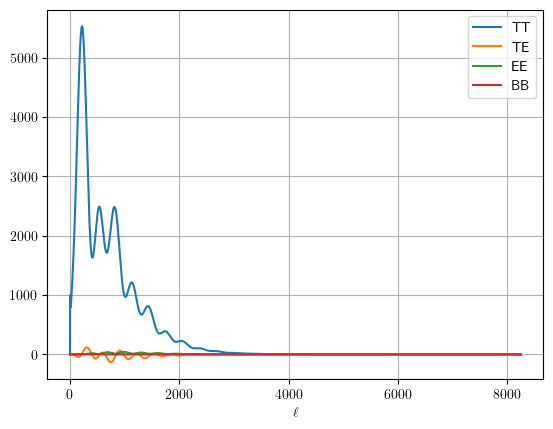

In [ ]:
import matplotlib.pyplot as plt
cl_dataframe.plot(grid=True)
plt.show()